# Least Squares Method with Low-level API
### 機械の中心部分に近いレベルでの操作方法を用いた、最小自乗法

注意：このノートブックはPython3および(GPUを用いない)CPU環境で動作するように設定されています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
GPUの有無に関わらずPython 3.x および　TensorFlow 2.xにて1.x環境を実行可能にする設定（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
2020/02/04: By H.Nishiyama<br>
2021/10/12 追加・変更部分のみ日本語化<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、次のセルを指示通りに修正して下さい。<br>

In [1]:
#オンラインのCloabシステムを使う場合、下記の行頭の「###」を削除する。
###%tensorflow_version 1.x

####[LSL-01]<br>
Import modules.<br>
*もし、TensorFlow 1.xを使うなら、次のセルを修正して下さい。<br>
*下記の2行をTensorFlow 2.xで実行することで、以下の全てがTensorFlow 1.x として実行されることになります。<br>
import tensorflow.compat.v1 as tf<br>
tf.disable_v2_behavior()<br>
*実行時に警告（Warning）が出るかも知れませんが、問題ありません。<br>
*参考）https://qiita.com/rawHam/items/626d9b119cbefcee1452<br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#--- TensorFlow 1.xを使う場合、次の行を実行可能にします。
#import tensorflow as tf
#--- TensorFlow 2.xを使う場合、上記の1行の代わりに次の2行を使います。（行頭の「#」を消して下さい）
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#--- TensorFlow 1.x環境であれば、上2行の行頭に「#」を付けてコメントアウトして下さい。

Instructions for updating:
non-resource variables are not supported in the long term


####[LSL-02]<br>
Prepare the training dateset.

In [3]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(0, 5)]
                    for mon in range(1, 13)])

####[LSL-03]<br>
`train_x` contains the list $[x^0, x^1, x^2, x^3, x^4]$ for $x=1,...,12$.

In [4]:
train_x

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000],
       [    1,    11,   121,  1331, 14641],
       [    1,    12,   144,  1728, 20736]])

####[LSL-04]<br>
`train_t` contins the corresponding lables for $x=1,...,12$.

In [5]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 8.6],
       [14.9],
       [18.2],
       [20.4],
       [25.5],
       [26.4],
       [22.8],
       [17.5],
       [11.1],
       [ 6.6]])

####[LSL-05]<br>

Definie a placeholder to hold the training dataset.<br>
*このセルはTF2.x では「AttributeError"」が表示されて実行できません。

In [6]:
x = tf.placeholder(tf.float32, [None, 5])

####[LSL-06]
Definie variables for weights.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [7]:
w = tf.Variable(tf.zeros([5, 1]))

####[LSL-07]
Definie a ploynomial to predict label values.

In [8]:
y = tf.matmul(x, w)

####[LSL-08]
Definie a placeholder to hold the label values.

In [9]:
t = tf.placeholder(tf.float32, [None, 1])

####[LSL-09]
Definine a loss function as Square error.

In [10]:
loss = tf.reduce_sum(tf.square(y-t))

####[LSL-10]
Define an optimization step  using the Adam optimizer

In [11]:
train_step = tf.train.AdamOptimizer().minimize(loss)

####[LSL-11]
Create a session and initialize variables.

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

####[LSL-12]
Apply the optimization step for 100,000 epochs.

In [13]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: {}, Loss: {}'.format(i, loss_val))

Step: 10000, Loss: 31.057472229003906
Step: 20000, Loss: 29.294565200805664
Step: 30000, Loss: 28.055601119995117
Step: 40000, Loss: 33.85791015625
Step: 50000, Loss: 25.77056121826172
Step: 60000, Loss: 24.765649795532227
Step: 70000, Loss: 23.837772369384766
Step: 80000, Loss: 23.28545379638672
Step: 90000, Loss: 22.175765991210938
Step: 100000, Loss: 21.436542510986328


####[LSL-13]
Show weights after the training.

In [14]:
sess.run(w)

array([[ 3.7647822 ],
       [-1.5897058 ],
       [ 1.7851104 ],
       [-0.20121387],
       [ 0.0053623 ]], dtype=float32)

####[LSL-14]
Define a function to predict values using the final weights.

In [15]:
ws = sess.run(w)
def predict(x):
    pred = sum([ws[n][0] * x**n for n in range(0, 5)])
    return pred

####[LSL-15]
Plot a chart for predictions.

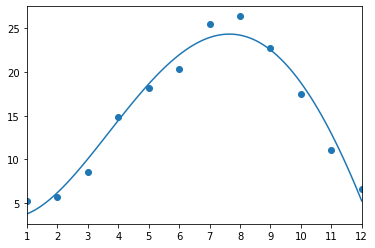

In [16]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.set_xticks(range(1, 13))
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)